# 广告投入与产品销量预测——数据分析

该数据集来自Advertising.csv是来自
http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv

数据集包含200个样本，每个样本有3个输入属性：
1. 电视广告投入
2. 收音机广告投入
3. 报纸广告
以及一个输出/响应：
4. 产品销量

## 1. 导入必要的工具包

In [1]:
#数据处理
import numpy as np 
import pandas as pd 

#数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

## 2. 读取数据

In [2]:
#读取数据
dpath = "./data/"
df = pd.read_csv(dpath + "Advertising.csv")

#df.columns = ['记录号','电视广告费用', '广播广告费用', '报纸广告费用', '产品销量']
df.columns = ['ID','TV', 'radio', 'newspaper', 'sales']
#通过观察前5行，了解数据每列（特征）的概况
df.head()

,ID,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 数据探索分析

In [3]:
# 数据总体信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
ID           200 non-null int64
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


均为连续值，无缺失数据

In [4]:
# 对数值型特征，得到每个特征的描述统计量，查看特征的大致分布
df.describe()

,ID,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## 单个特征值的直方图
seaborn的distplot方法可以对数值型特征绘制直方图（distribution plot）
DataFrame的hist()方法也可用于绘制直方图

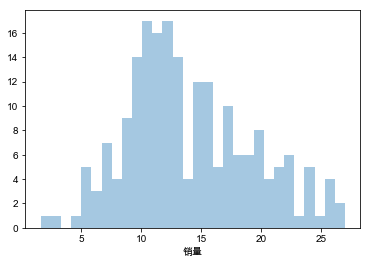

In [5]:
# 目标y（销量）的直方图
fig = plt.figure()
sns.distplot(df['sales'], bins=30, kde=False)
plt.xlabel(u'销量')
plt.show()

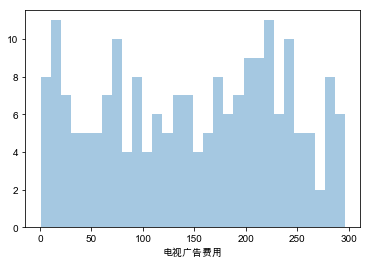

In [6]:
# TV（电视广告费用）的直方图
fig = plt.figure()
sns.distplot(df['TV'], bins=30, kde=False)
plt.xlabel(u'电视广告费用')
plt.show()

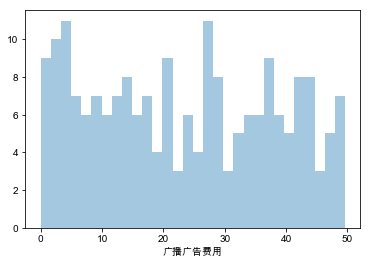

In [7]:
# radio（广播广告费用）的直方图
fig = plt.figure()
sns.distplot(df['radio'], bins=30, kde=False)
plt.xlabel(u'广播广告费用')
plt.show()

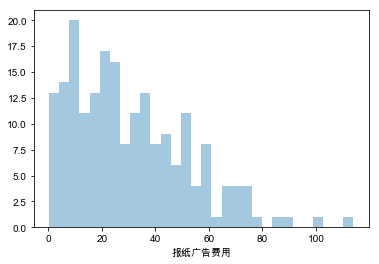

In [8]:
# newspapper（报纸广告费用）的直方图
fig = plt.figure()
sns.distplot(df['newspaper'], bins=30, kde=False)
plt.xlabel(u'报纸广告费用')
plt.show()

## 散点图可以查看两个变量之间的关系
sns.jointplot可以画出两个变量的散点图及每个特征的分布
sns.pairplot可以绘制散点图矩阵：对角线为单个变量的分布，其余部分为每对变量的散点图

Text(0,0.5,u'\u9500\u91cf')

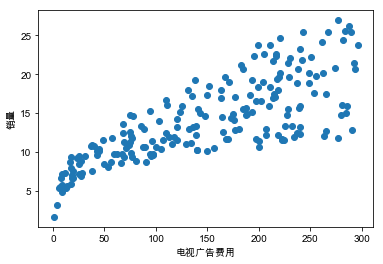

In [9]:
#散点图查看单个特征与目标之间的关系
plt.scatter(df['TV'], df['sales'])
plt.xlabel(u'电视广告费用')
plt.ylabel(u'销量')

TV和sales关联密切，但似乎不完全是线性关系,尤其TV值较大和较小时

Text(0,0.5,u'log(\u9500\u91cf)')

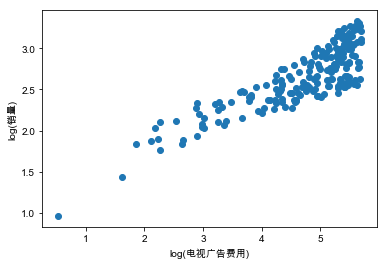

In [12]:
log_TV = np.log1p(df['TV'])
log_sales = np.log1p(df['sales'])

plt.scatter(log_TV, log_sales)
plt.xlabel(u'log(电视广告费用)')
plt.ylabel(u'log(销量)')

log(TV)和log(sales)之间的线性关系似乎更明显

Text(0,0.5,u'\u9500\u91cf')

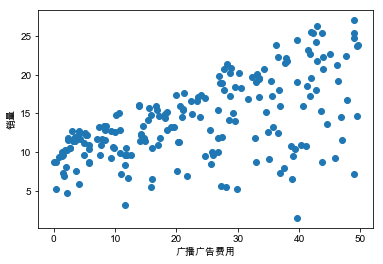

In [10]:
plt.scatter(df['radio'], df['sales'])
plt.xlabel(u'广播广告费用')
plt.ylabel(u'销量')

radio和sales有关系，但似乎也不是线性关系

newspaper和sales的关系不明显

Text(0,0.5,u'\u9500\u91cf')

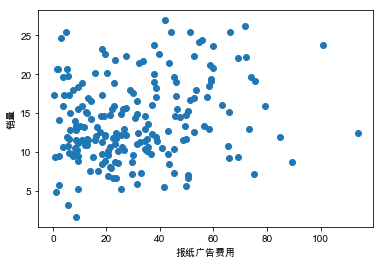

In [11]:
plt.scatter(df['newspaper'], df['sales'])
plt.xlabel(u'报纸广告费用')
plt.ylabel(u'销量')

Text(0,0.5,u'\u5e7f\u64ad\u5e7f\u544a\u8d39\u7528')

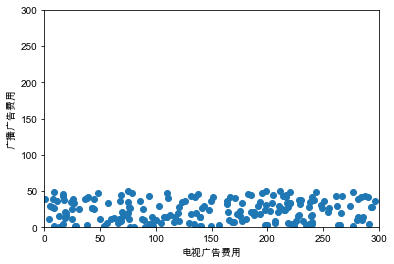

In [12]:
plt.xlim(0,300)
plt.ylim(0,300)

plt.scatter(df['TV'], df['radio'])
plt.xlabel(u'电视广告费用')
plt.ylabel(u'广播广告费用')

## 相关系数查看特征与特征、特征与响应之间的线性相关性

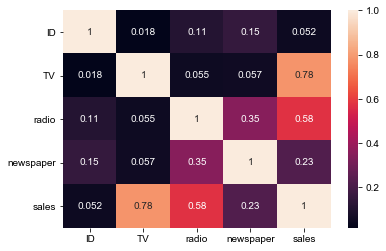

In [13]:
# 得到相关系数的绝对值，通常认为相关系数的绝对值大于0.6的特征为强相关
data_corr = df.corr()
data_corr = data_corr.abs()
sns.heatmap(data_corr,annot=True)
plt.show()

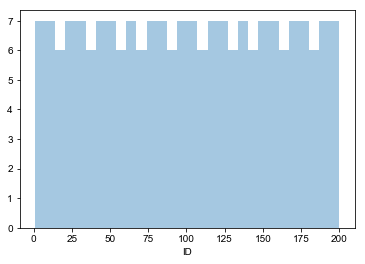

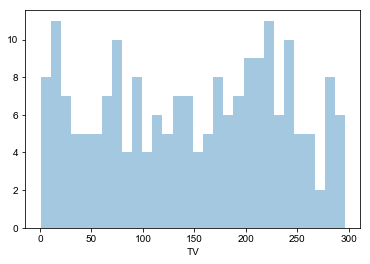

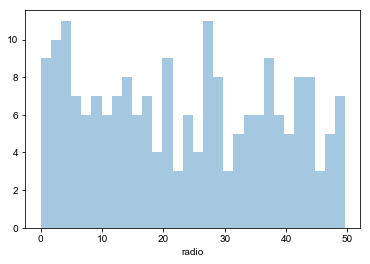

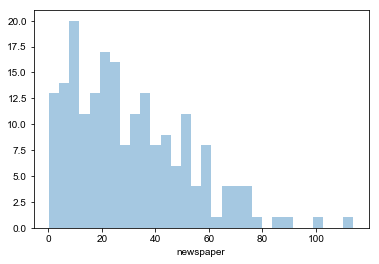

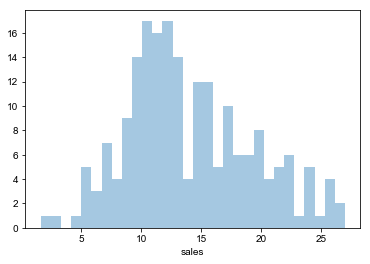

In [14]:
#特征名称，用于后续显示权重系数对应的特征
feat_names = df.columns
n_feats =df.columns.size

for i in range(n_feats):
    fig = plt.figure()
    sns.distplot(df[feat_names[i]], bins=30, kde=False)
    plt.xlabel(feat_names[i])
    plt.show()

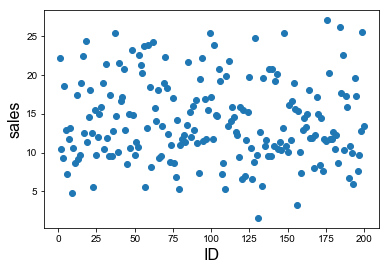

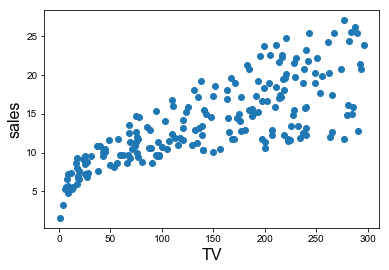

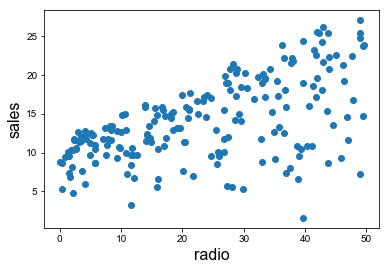

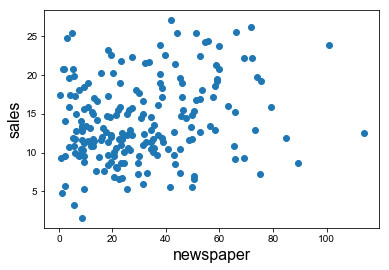

In [15]:
y = df['sales']
X = df.drop(['sales'], axis=1)

feat_names = X.columns 
n_feats =X.columns.size

for i in range(n_feats):
    fig = plt.figure()
    plt.scatter(df[feat_names[i]], y)
    plt.xlabel(feat_names[i], fontsize=16)
    plt.ylabel('sales', fontsize=16)
    plt.show()